In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import pandas as pd 
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Report

### 1st Attempt - Manual Tuning
I initially attempted to optimize the model by manually adjusting all the different hyperparameters, such as epochs, layers, neurons, activation functions, etc, but was unable to achieve a significant improvement remaining at around 72-73% accuracy.

Now I'm adjusting the notebook to use Keras Tuner to automatically optimize the model to see if it will affect outcome.

### 2nd Attempt - Auto Tuning (Keras Tuner)
After running Keras Tuner optimize the model, the accuracy did not significantly improve and the best model produced an accuracy score of Accuracy: 0.7323614954948425.

### 3rd Attempt - Adding L2 Regularisation with Keras Tuner
I added L2 Regularisation and the accuracy was still 0.73.

### Underfitting
The accuracy is poor on both the training and testing, so this must mean the model is underfitting.

Below are some of the things I have tried to improve the training result.

* Increase model complexity - keras tuner is selecting the optimal complexity.
* Not training long enough - I've tried increasing this significantly with little effect on the accuracy score.
* Using wrong activation functions i.e. linear functions for non-linear data - I've given 4 different activation functions to Keras Tuner.
* Remove or reduce regularization - with and without regularization didn't have a significant impact.
* Adding more features - the current features are not decisive enough/ are insufficient for determining a relationship. I'm not able to add more features here.
* Remove noisy features - I performed a PCA analysis on data and it seems there are only 3 features which have a high explained variance. This means there are not enough features in the data that will enable the model to detect patterns.

### Outliers
I used df.describe() and then calculated the upper and lower limits to determine if there were any outliers. I removed the outliers from the ASK_AMT column, however this was 8,206 rows, approx 24% of the data! (I am not happy with removing this much data, but I did so just for the sake of testing how much the score would improve). After removing these outliers I ran the neural network model again with keras tuner and was only able to achieve and accuracy of 0.7458614110946655 - A marginal increase (~ +1.45%).

### Remove Regularisation
I removed the regularisation as that's supposed to be used when the model is overfitting. It should not be used on an underfittng model, so I removed it and got a marginal increase with the score increasing to 0.74647456407547 on the data with removed outliers.

### PCA
I woud like to use PCA, but we have not covered how to use it for tensorflow. There is documentation here https://www.tensorflow.org/tfx/transform/api_docs/python/tft/pca but as it's not stated in the instruction or Rubrik, and that we have not learnt to use it, I will leave this out for now, but I am curious to try it.



### Overview of the analysis:

This analysis to determine whether this neural network model is suitable for training on our historical data and if it can accurately predict the target label on unseen data after training. Also to see if tuning the model by adjusting the hyperparameters of the model resulted in better training and testing result.


### Results: 
##### Data Preprocessing

* What variable(s) are considered the target(s) for your model? - the "IS_SUCCESSFUL" column of the dataset contains contains our target variables.

* What variable(s) are considered to be the features for your model? - All of the columns apart from non-feature columns such as unique identifiers and our target/label.

* What variable(s) are neither targets nor features, and should be removed from the input data? - EIN and NAME are unique identifiers and not features of the data. They should be removed.


### Compiling, Training, and Evaluating the Model

* How many neurons, layers, and activation functions did you select for your neural network model, and why? - I used Keras Tuner to determine the optimal hyperparameters of the model.

* Were you able to achieve the target model performance? No. With the entire data after pre-processing without removing outliers the best result was 73% and with removing outliers was 74.5%.

* What steps did you take to try and increase model performance? - All steps are outlined above.

### Summary: 
Summarize the overall results of the deep learning model. Include a recommendation for how a different model could solve this classification problem, and explain your recommendation.

As this is a binary classification problem I would try using decision trees such as random forest, or logistic regression.

According to https://www.dtreg.com/methodology/view/decision-trees-compared-to-regression-and-neural-networks:

"Binary categorical input data for neural networks can be handled by using 0/1 (off/on) inputs, but categorical variables with multiple classes (for example, marital status or the state in which a person resides) are awkward to handle. Classifying a result into multiple categories usually is done by setting arbitrary value thresholds for discriminating one category from another. It would be difficult to devise a neural network to classify the location of residence into the 50 U.S. states. Classification trees, on the other hand, handle this type of problem naturally."

### Conclusion:
Our data has mnany categorical variables with multiple classes, and therefore I would use a Classification Tree instead of Neural Network.


In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [6]:
# check for outliers
application_df.describe()

## ask amount looks like it has outliers due to max being much greater than 75%

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


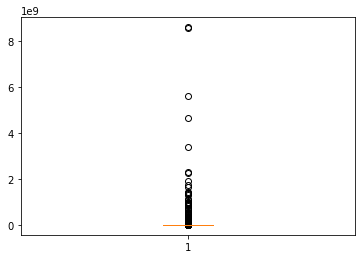

In [7]:
# use a boxplot to check for outliers

plt.boxplot(application_df["ASK_AMT"])
plt.show()

We can see there are many outliers

In [8]:
# get upper and lower limits
Q1 = application_df["ASK_AMT"].quantile(0.25)
Q3 = application_df["ASK_AMT"].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

887.0
11855.0


In [9]:
#check rows outside of limits

outliers = application_df.loc[(application_df.ASK_AMT < 887) | (application_df.ASK_AMT > 11855)]
outliers

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
...,...,...,...,...,...,...,...,...,...,...
34280,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,401661,0
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,56261,1
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1


8206 outliers! I don't know if I want to remove that much data! Almost 24% of the entire dataset.

In [10]:
outliers_list = outliers.index.tolist()
len(outliers_list)

8206

In [11]:
application_df = application_df.drop(outliers_list)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


Please note I have already run the model before without dropping outliers. This is an additional run.

In [12]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = application_df["APPLICATION_TYPE"].value_counts().loc[lambda x : x < 200].keys().to_list()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       20086
T4        1331
T19        999
T5         894
T6         882
T8         669
T7         633
T10        508
Other       91
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = application_df["CLASSIFICATION"].value_counts().loc[lambda x : x < 1000].keys().to_list()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    12557
C2000     4693
C1200     3997
Other     1686
C2100     1623
C3000     1537
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
encoded_df = pd.get_dummies(application_df)
encoded_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = encoded_df.drop("IS_SUCCESSFUL", axis=1)
y = encoded_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

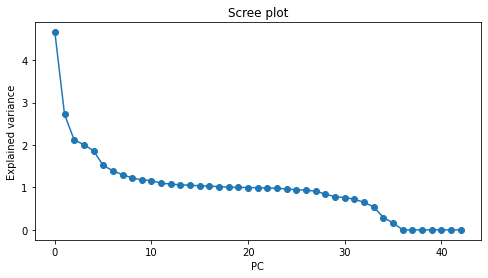

In [17]:
# Check optimal number of features
# Initialize PCA model with max. number of PCs
pca = PCA(n_components=None)

# Get fit the PCA model
pca.fit(X_train_scaled)

# Fetch the explained variances for each PC
pc_vars = pca.explained_variance_

# Build plot
plt.figure(figsize=(8,4))
plt.plot(pc_vars, marker="o")
plt.xlabel('PC')
plt.ylabel('Explained variance')
plt.title("Scree plot")
plt.show()

#### Screen Plot Analysis
It seems only the first 3 features have a significant explained variance. This will likely mean that that model will underfit as there are not enough features with significant variance.

In [18]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid', 'linear'])
    
    # Allow kerastuner to decide number of neurons in first layer
    units_param = hp.Int('first_units', min_value=1, max_value=10, step=2)
    nn.add(tf.keras.layers.Dense(units=units_param, activation=activation, input_dim=len(X.columns)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
      units_param = hp.Int('units_'+ str(i), min_value=1, max_value=10, step=2)
      nn.add(tf.keras.layers.Dense(units=units_param, activation=activation))

    # Add output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn

In [19]:
# Define tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite=True)

In [20]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 41s]
val_accuracy: 0.7470876574516296

Best val_accuracy So Far: 0.7470876574516296
Total elapsed time: 00h 13m 33s
INFO:tensorflow:Oracle triggered exit


In [21]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 4,
 'units_0': 9,
 'units_1': 3,
 'units_2': 7,
 'units_3': 1,
 'units_4': 5,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 3,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '7e233c96139d115ffaa07bd7bfba4909'}

In [22]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - loss: 0.5582 - accuracy: 0.7471 - 426ms/epoch - 2ms/step
Loss: 0.5582210421562195, Accuracy: 0.7470876574516296


In [23]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
best_model.save("AlphabetSoupCharity_Optimization_KerasTuner.h5")

### Report Included at top of Notebook